<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Kaggle Competitions: House Prices - Advanced Regression Techniques  @FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 01 - Data exploration 📌
</div>

# Import the library

In [575]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

# Explore data

## Load the dataset

In [576]:
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

In [577]:

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### How many rows and how many columns does the raw data have?

In [578]:
df_train.shape

(1460, 81)

### What does each line mean?

Information of each house sold

### Does the raw data have duplicate rows?

In [579]:
num_duplicated_rows = df_train.duplicated().sum()

In [580]:
if num_duplicated_rows == 0:
    print(f"Data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Data have no duplicated line.!


### What does each column mean? 

- SalePrice -the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### What data type does each column currently have?

In [581]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Explore numerical data

### For each column with numeric data type, how are the values distributed?
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

In [582]:
def missing_ratio(x):
    missing_ratio = x.isnull().sum()/len(x)
    return missing_ratio.round(1)

def lower_quartile(x):
    return x.quantile(0.25).round(1)

def median(x):
    return x.median().round(1)

def upper_quartile(x):
    return x.quantile(0.75).round(1)

# Tạo DataFrame trống
num_col_info_df = pd.DataFrame(df_train.select_dtypes(include=[np.number]))
num_col_info_df = num_col_info_df.agg([ missing_ratio,"min",lower_quartile, median,upper_quartile,"max"])

In [583]:
num_col_info_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
missing_ratio,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
lower_quartile,365.8,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
median,730.5,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
upper_quartile,1095.2,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


### Drop numerical columns with so many missing value

In [584]:
def drop_missing_features_numerical(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 50.0) -> pd.DataFrame:
    for col, missing_rate in missing_lst.items():
        if missing_rate > threshold:
            del df[col]
    return df
df_train = drop_missing_features_numerical(df_train)

### Fill missing numerical value by mean

In [585]:
def filling_missing_value_numerical(df: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_columns:
        mean = df[col].mean() 
        df[col].fillna(value=mean, inplace=True) 
    
    return df
df_train = filling_missing_value_numerical(df_train)

## Preprocess outliers

In [586]:
df_train.dtypes[df_train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### MSSubClass

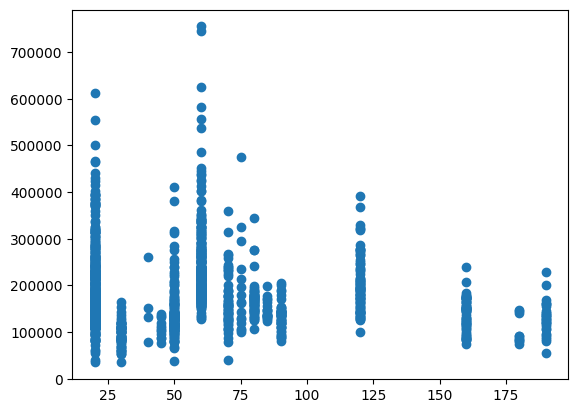

In [587]:
plt.scatter( x= 'MSSubClass',y ='SalePrice', data= df_train)

### LotFrontage

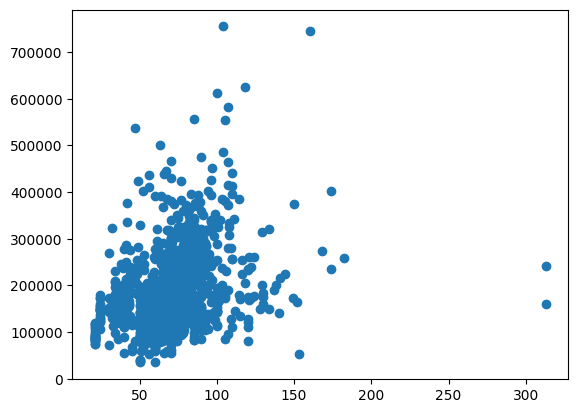

In [588]:
plt.scatter( x= 'LotFrontage',y ='SalePrice', data= df_train)

In [589]:
df_train.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


### Drop LotFrontage outliers


In [590]:
# Tìm các dòng có giá trị LotFrontage lớn hơn 300 và lấy index của chúng
rows_to_drop = df_train.query('LotFrontage > 300').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### LotArea

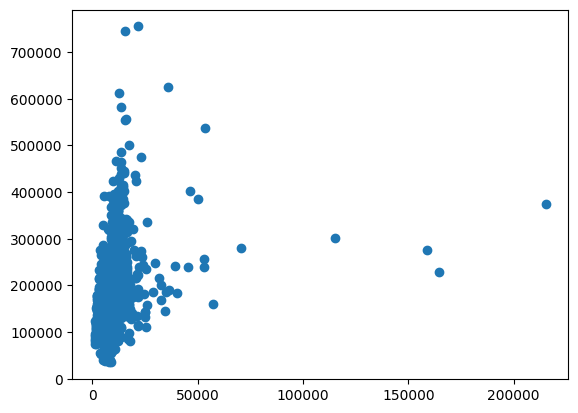

In [591]:
plt.scatter( x= 'LotArea',y ='SalePrice', data= df_train)

In [592]:
df_train.query('LotArea > 60000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,70.049958,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.000000,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,70.049958,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.000000,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,70.049958,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [593]:

rows_to_drop = df_train.query('LotArea > 60000').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### OverallQual

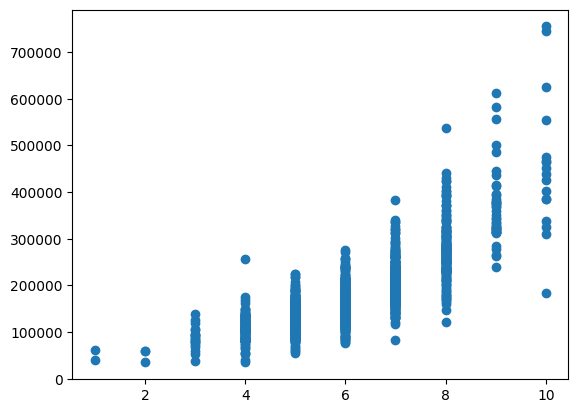

In [594]:
plt.scatter( x= 'OverallQual',y ='SalePrice', data= df_train)

In [595]:
df_train.query('OverallQual == 4 & SalePrice > 200000 | OverallQual == 8 & SalePrice > 500000 | OverallQual == 10 & SalePrice < 200000 | SalePrice > 700000'  )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,458,20,RL,70.049958,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
523,524,60,RL,130.000000,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.000000,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.000000,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
1182,1183,60,RL,160.000000,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [596]:

rows_to_drop = df_train.query('OverallQual == 4 & SalePrice > 200000 | OverallQual == 8 & SalePrice > 500000 | OverallQual == 10 & SalePrice < 200000 | SalePrice > 700000'  ).index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### OverallCond

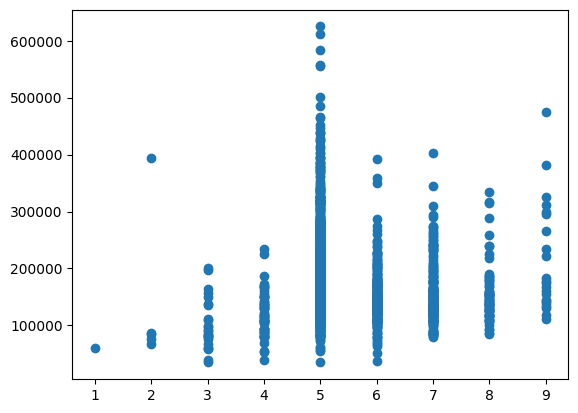

In [597]:
plt.scatter( x= 'OverallCond',y ='SalePrice', data= df_train)

In [598]:
rows_to_drop = df_train.query('OverallCond == 2 & SalePrice > 300000').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### YearBuilt

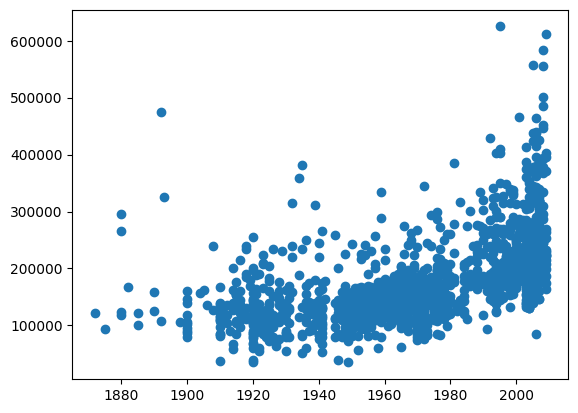

In [599]:
plt.scatter( x= 'YearBuilt',y ='SalePrice', data= df_train)

In [600]:
rows_to_drop = df_train.query('YearBuilt < 1900 & SalePrice > 400000').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### YearRemodAdd

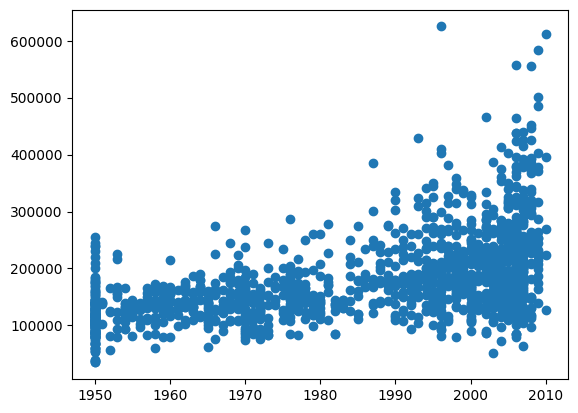

In [601]:
plt.scatter( x= 'YearRemodAdd',y ='SalePrice', data= df_train)

In [602]:
df_train.query('YearRemodAdd == 1995 & SalePrice > 600000')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [603]:
rows_to_drop = df_train.query('YearRemodAdd == 1995 & SalePrice > 600000').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### MasVnrArea

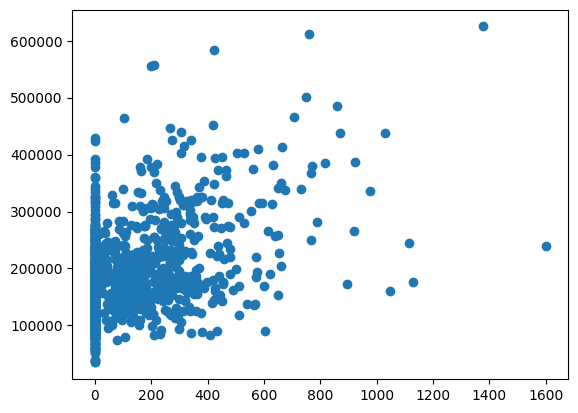

In [604]:
plt.scatter( x= 'MasVnrArea',y ='SalePrice', data= df_train)

In [605]:
df_train.query('(MasVnrArea > 1400 & SalePrice > 200000) | (MasVnrArea < 600 & SalePrice > 500000)')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581


In [606]:
rows_to_drop = df_train.query('(MasVnrArea > 1400 & SalePrice > 200000) | (MasVnrArea < 600 & SalePrice > 500000)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### BsmtFinSF1

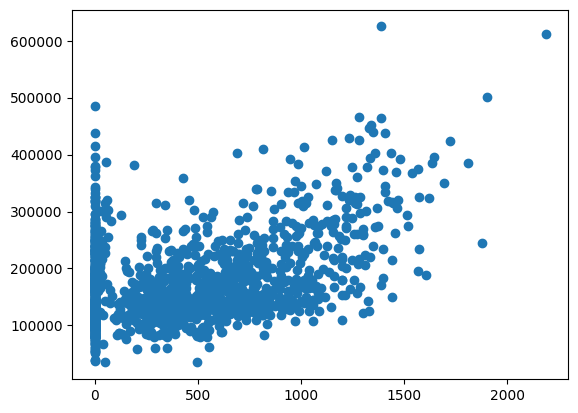

In [607]:
plt.scatter( x= 'BsmtFinSF1',y ='SalePrice', data= df_train)

In [608]:
df_train.query('BsmtFinSF1 > 1870')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [609]:
rows_to_drop = df_train.query('BsmtFinSF1 > 1870').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### BsmtFinSF2

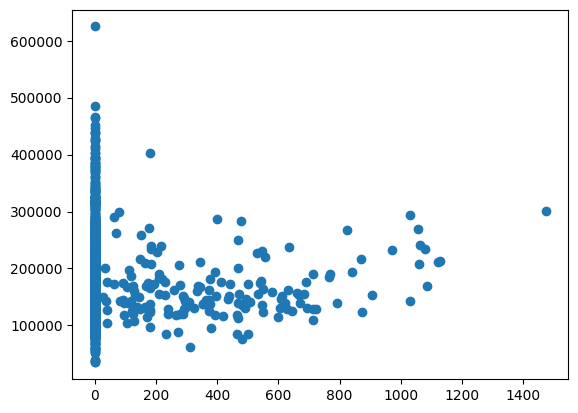

In [610]:
plt.scatter( x= 'BsmtFinSF2',y ='SalePrice', data= df_train)

In [611]:
df_train.query('(BsmtFinSF2 > 1400) | (BsmtFinSF2 < 200 &  BsmtFinSF2 > 100 & SalePrice > 400000)')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000


In [612]:
rows_to_drop = df_train.query('(BsmtFinSF2 > 1400) | (BsmtFinSF2 < 200 &  BsmtFinSF2 > 100 & SalePrice > 400000)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### BsmtUnfSF

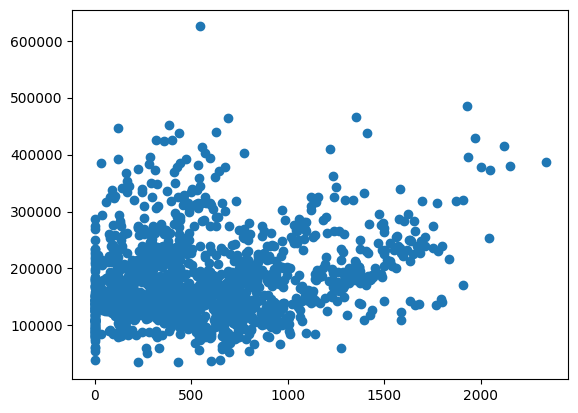

In [613]:
plt.scatter( x= 'BsmtUnfSF',y ='SalePrice', data= df_train)

### TotalBsmtSF

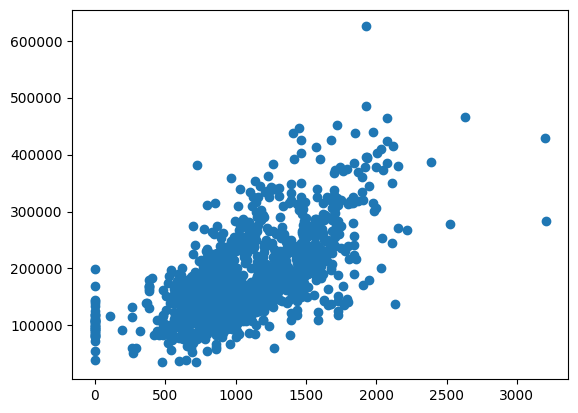

In [614]:
plt.scatter( x= 'TotalBsmtSF',y ='SalePrice', data= df_train)

In [615]:
rows_to_drop = df_train.query('TotalBsmtSF > 2500').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### 1stFlrSF

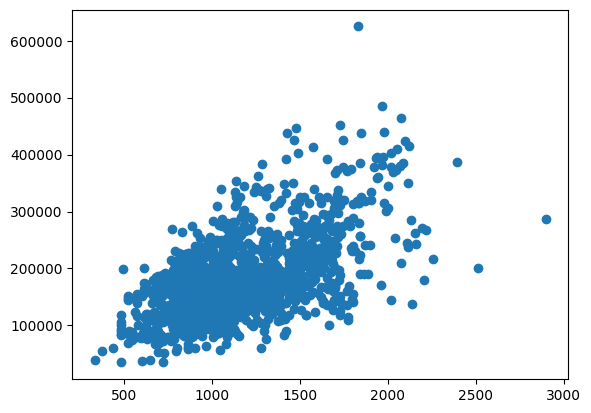

In [616]:
plt.scatter( x= '1stFlrSF',y ='SalePrice', data= df_train)

In [617]:
df_train.query('(`1stFlrSF` > 2500)')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
529,530,20,RL,70.049958,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
1024,1025,20,RL,70.049958,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,287000


In [618]:
rows_to_drop = df_train.query('(`1stFlrSF` > 2500)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### 2ndFlrSF

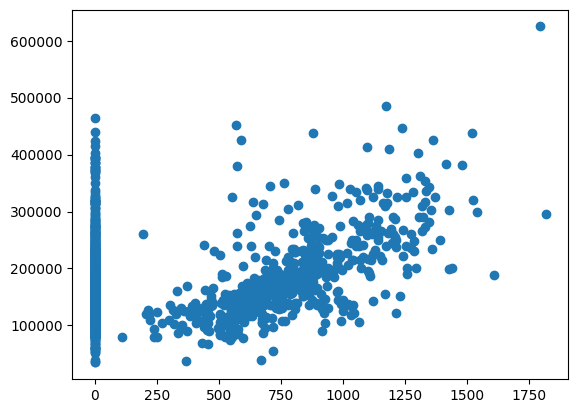

In [619]:
plt.scatter( x= '2ndFlrSF',y ='SalePrice', data= df_train)

In [620]:
df_train.query('(`2ndFlrSF` > 1600)')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1360,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000


In [621]:
rows_to_drop = df_train.query('(`2ndFlrSF` > 1600)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### LowQualFinSF

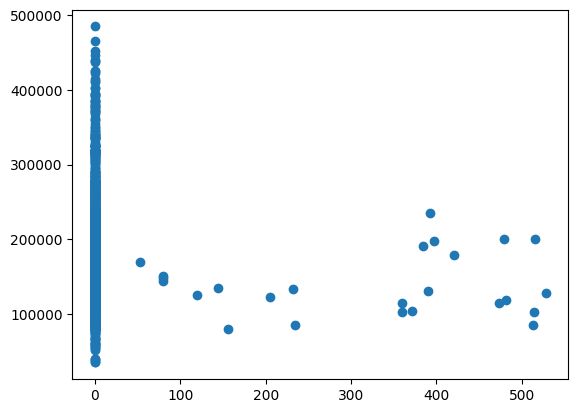

In [622]:
plt.scatter( x= 'LowQualFinSF',y ='SalePrice', data= df_train)

### GrLivArea

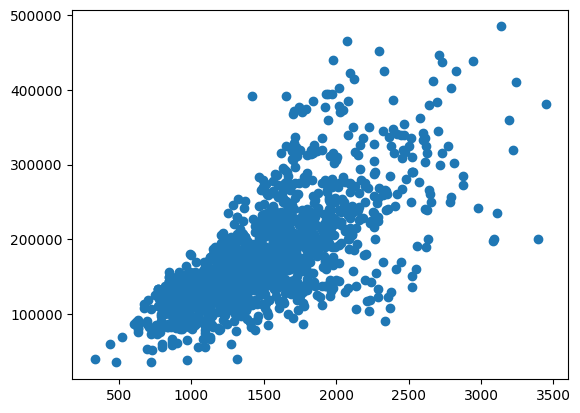

In [623]:
plt.scatter( x= 'GrLivArea',y ='SalePrice', data= df_train)

### BsmtFullBath

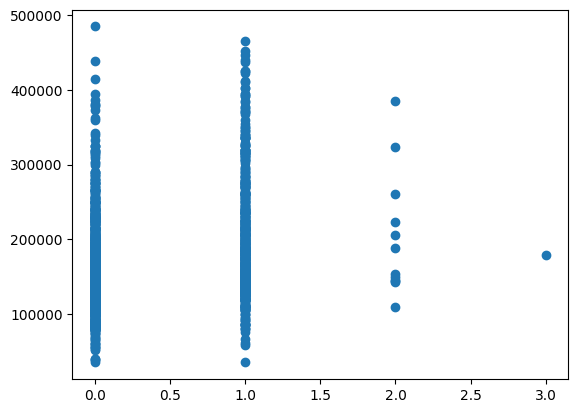

In [624]:
plt.scatter( x= 'BsmtFullBath',y ='SalePrice', data= df_train)

In [625]:
rows_to_drop = df_train.query('(`BsmtFullBath` == 3)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### BsmtHalfBath

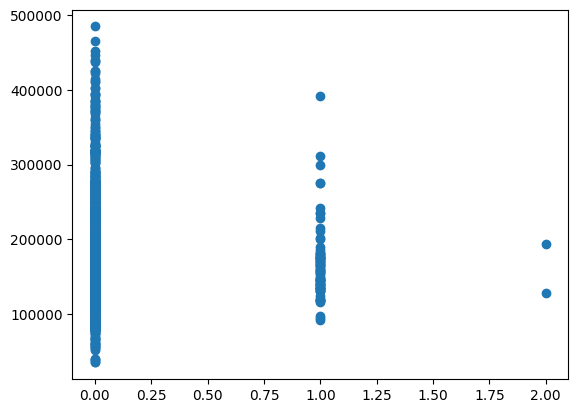

In [626]:
plt.scatter( x= 'BsmtHalfBath',y ='SalePrice', data= df_train)

In [627]:
rows_to_drop = df_train.query('(`BsmtHalfBath` == 2)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### FullBath

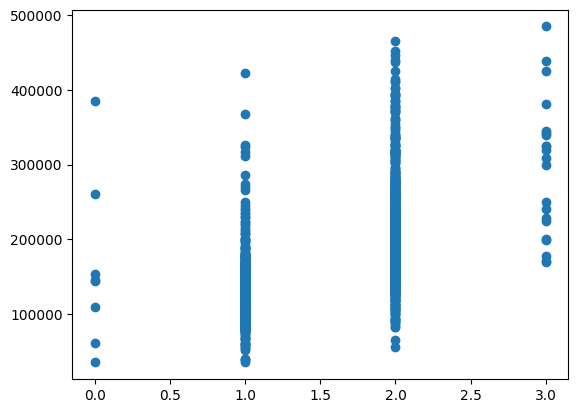

In [628]:
plt.scatter( x= 'FullBath',y ='SalePrice', data= df_train)

### HalfBath

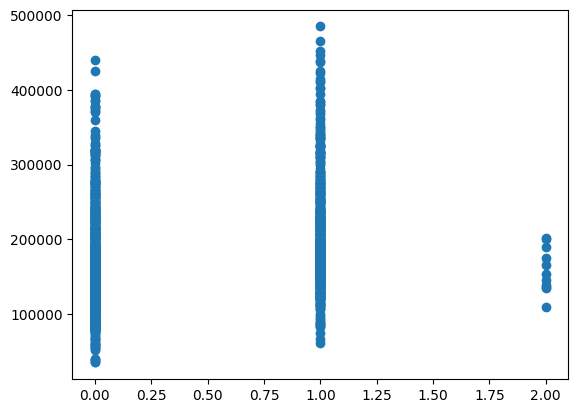

In [629]:
plt.scatter( x= 'HalfBath',y ='SalePrice', data= df_train)

### BedroomAbvGr

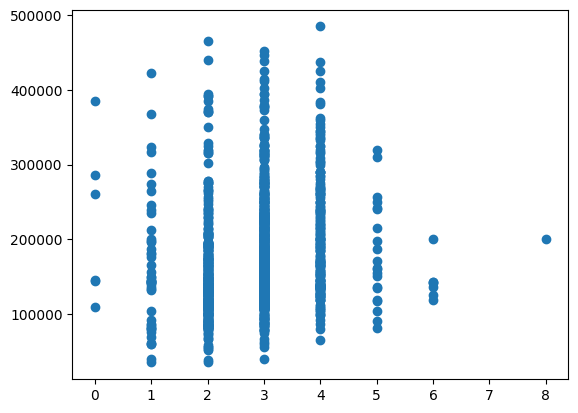

In [630]:
plt.scatter( x= 'BedroomAbvGr',y ='SalePrice', data= df_train)

In [631]:
rows_to_drop = df_train.query('(`BedroomAbvGr` == 8)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### KitchenAbvGr

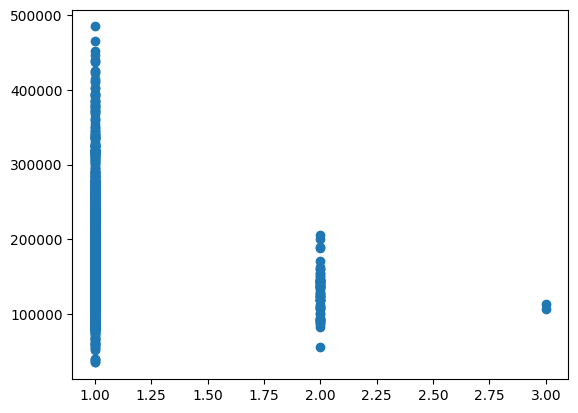

In [632]:
plt.scatter( x= 'KitchenAbvGr',y ='SalePrice', data= df_train)

In [633]:
rows_to_drop = df_train.query('(`KitchenAbvGr` == 3)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### TotRmsAbvGrd

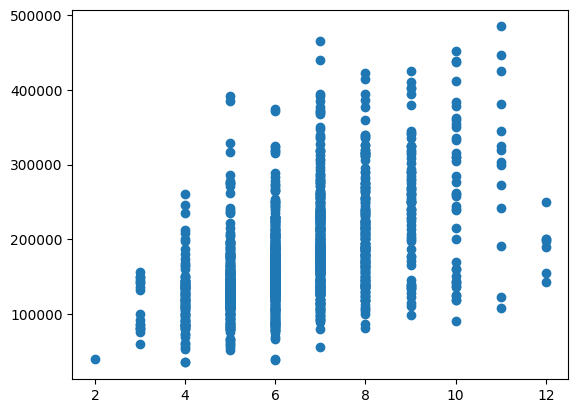

In [634]:
plt.scatter( x= 'TotRmsAbvGrd',y ='SalePrice', data= df_train)

### Fireplaces

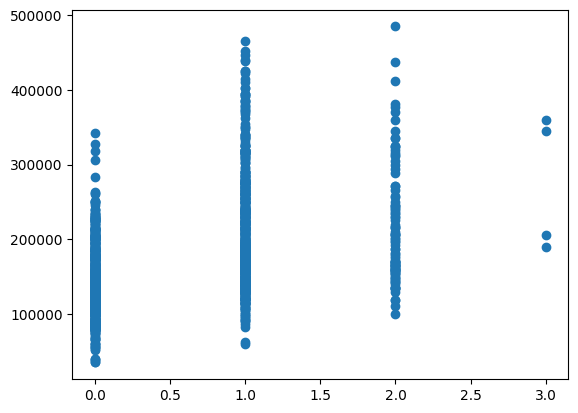

In [635]:
plt.scatter( x= 'Fireplaces',y ='SalePrice', data= df_train)

In [636]:
rows_to_drop = df_train.query('(`Fireplaces` == 3)').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### GarageYrBlt

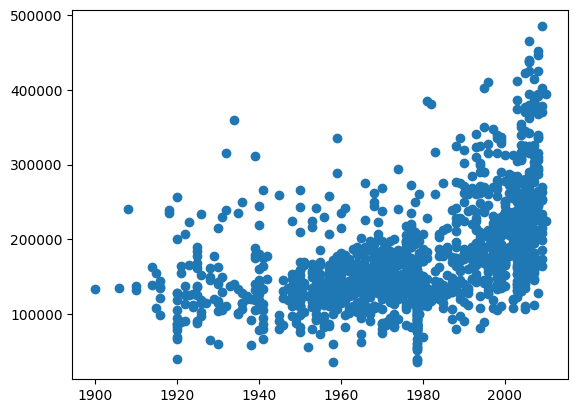

In [637]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

### GarageYrBlt

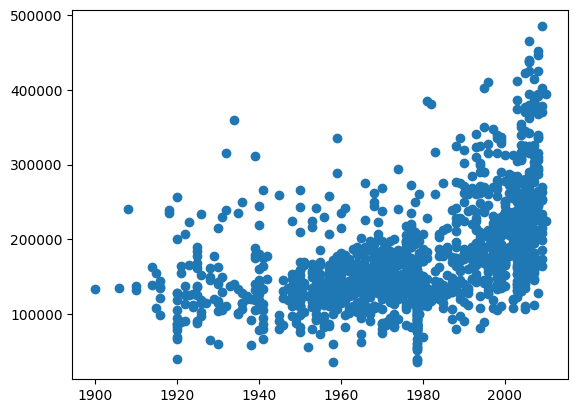

In [638]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

### GarageCars

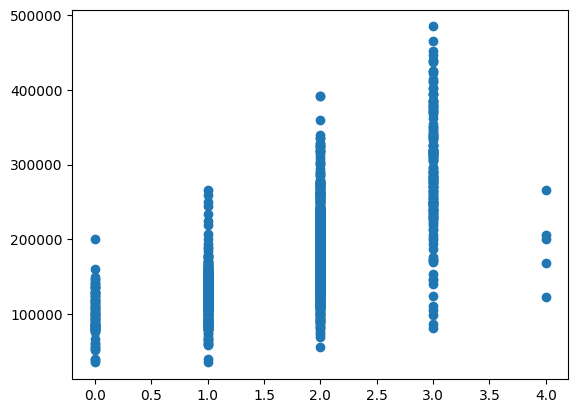

In [639]:
plt.scatter(x='GarageCars', y='SalePrice', data=df_train)

### GarageArea

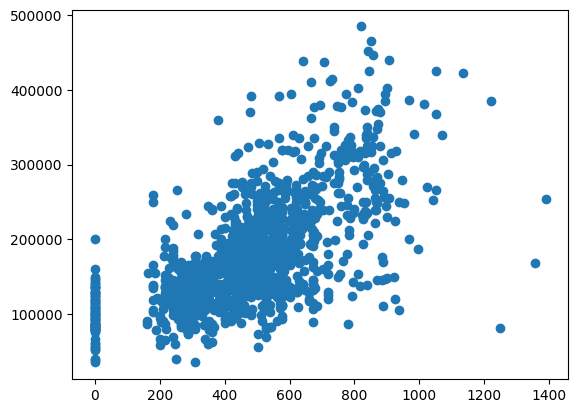

In [640]:
plt.scatter(x='GarageArea', y='SalePrice', data=df_train)

In [641]:
rows_to_drop = df_train.query('GarageArea > 1200').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### WoodDeckSF

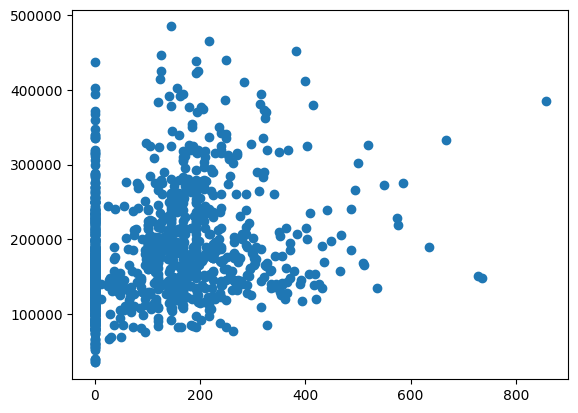

In [642]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df_train)

In [643]:
rows_to_drop = df_train.query('WoodDeckSF > 700').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### OpenPorchSF

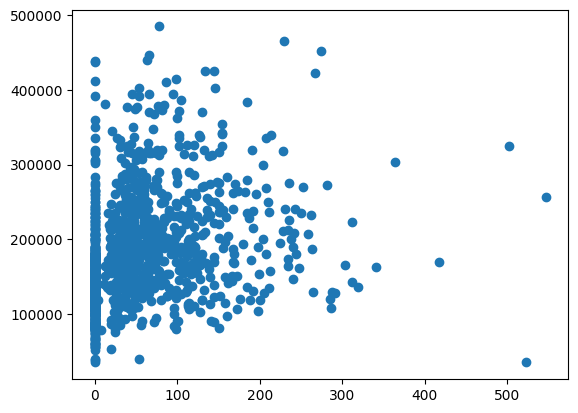

In [644]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df_train)

In [645]:
rows_to_drop = df_train.query('OpenPorchSF > 350').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### EnclosedPorch

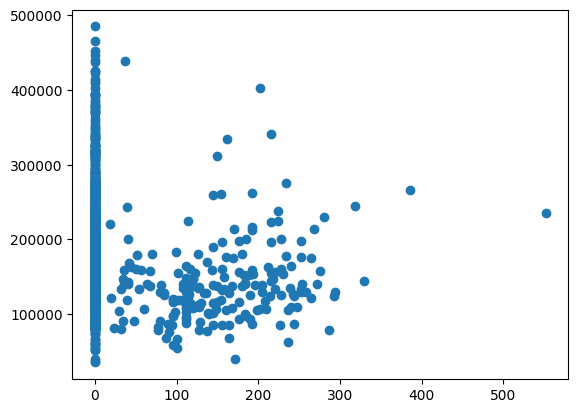

In [646]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df_train)

In [647]:
rows_to_drop = df_train.query('EnclosedPorch < 50 & EnclosedPorch > 10 & SalePrice > 400000').index

# Xóa các dòng có index tương ứng
df_train.drop(rows_to_drop, inplace=True)

### 3SsnPorch

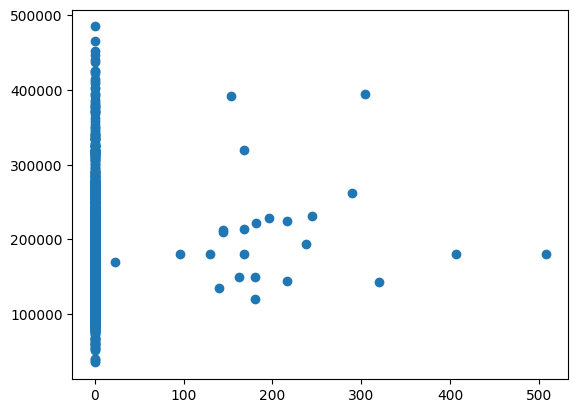

In [648]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=df_train)

### PoolArea

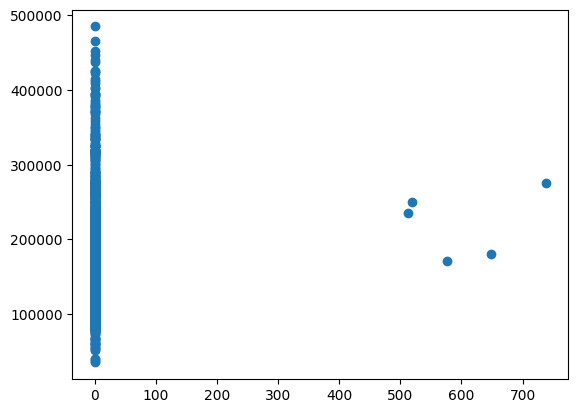

In [649]:
plt.scatter(x='PoolArea', y='SalePrice', data=df_train)

# Explore categorical data

### For each column with a non-numeric data type, how are the values distributed?
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types. (Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà có kiểu là categorical, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng các giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là mà sẽ đếm số lượng phần tử các loại.)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

In [650]:
cat_col_info_df = df_train.select_dtypes(include='object')
def missing_ratio(x):
    missing_ratio = x.isnull().sum()/len(x)
    return missing_ratio
    
def num_values(x):
    result = x.value_counts().to_dict()
    return result


def value_ratios(x):

    result = {}
    counterDict = num_values(x)
    total = sum(counterDict.values())
    for key,val in counterDict.items():
        result[key] = val / total
    return result



cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
missing_ratio,0.0,0.0,0.937367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054093,0.054093,0.054093,0.054093,0.0,0.996441,0.807117,0.964413,0.0,0.0
num_values,"{'RL': 1108, 'RM': 211, 'FV': 63, 'RH': 15, 'C...","{'Pave': 1401, 'Grvl': 4}","{'Grvl': 49, 'Pave': 39}","{'Reg': 900, 'IR1': 463, 'IR2': 34, 'IR3': 8}","{'Lvl': 1271, 'Bnk': 60, 'HLS': 46, 'Low': 28}","{'AllPub': 1404, 'NoSeWa': 1}","{'Inside': 1015, 'Corner': 255, 'CulDSac': 84,...","{'Gtl': 1336, 'Mod': 60, 'Sev': 9}","{'NAmes': 221, 'CollgCr': 150, 'OldTown': 107,...","{'Norm': 1214, 'Feedr': 78, 'Artery': 46, 'RRA...",...,"{'Attchd': 834, 'Detchd': 381, 'BuiltIn': 81, ...","{'Unf': 596, 'RFn': 410, 'Fin': 323}","{'TA': 1265, 'Fa': 46, 'Gd': 13, 'Po': 3, 'Ex'...","{'TA': 1277, 'Fa': 35, 'Gd': 9, 'Po': 6, 'Ex': 2}","{'Y': 1289, 'N': 86, 'P': 30}","{'Fa': 2, 'Gd': 2, 'Ex': 1}","{'MnPrv': 151, 'GdPrv': 57, 'GdWo': 52, 'MnWw'...","{'Shed': 45, 'Gar2': 2, 'Othr': 2, 'TenC': 1}","{'WD': 1228, 'New': 109, 'COD': 41, 'ConLD': 8...","{'Normal': 1164, 'Partial': 112, 'Abnorml': 96..."
value_ratios,"{'RL': 0.7886120996441282, 'RM': 0.15017793594...","{'Pave': 0.9971530249110321, 'Grvl': 0.0028469...","{'Grvl': 0.5568181818181818, 'Pave': 0.4431818...","{'Reg': 0.6405693950177936, 'IR1': 0.329537366...","{'Lvl': 0.904626334519573, 'Bnk': 0.0427046263...","{'AllPub': 0.999288256227758, 'NoSeWa': 0.0007...","{'Inside': 0.7224199288256228, 'Corner': 0.181...","{'Gtl': 0.9508896797153025, 'Mod': 0.042704626...","{'NAmes': 0.15729537366548044, 'CollgCr': 0.10...","{'Norm': 0.8640569395017793, 'Feedr': 0.055516...",...,"{'Attchd': 0.6275395033860045, 'Detchd': 0.286...","{'Unf': 0.44845748683220465, 'RFn': 0.30850263...","{'TA': 0.9518434913468774, 'Fa': 0.03461249059...","{'TA': 0.9608728367193379, 'Fa': 0.02633559066...","{'Y': 0.9174377224199288, 'N': 0.0612099644128...","{'Fa': 0.4, 'Gd': 0.4, 'Ex': 0.2}","{'MnPrv': 0.5571955719557196, 'GdPrv': 0.21033...","{'Shed': 0.9, 'Gar2': 0.04, 'Othr': 0.04, 'Ten...","{'WD': 0.8740213523131672, 'New': 0.0775800711...","{'Normal': 0.8284697508896797, 'Partial': 0.07..."


### Preprocessing categorical columns with so many missing value (> 50%)

#### Fill NA (pandas think it is null value) by "No"

In [651]:
df_train['Alley'].fillna('No', inplace=True)
df_test['Alley'].fillna('No', inplace=True)

In [652]:
df_train['Fence'].fillna('No', inplace=True)
df_test['Fence'].fillna('No', inplace=True)

In [653]:
df_train['MasVnrType'].fillna('No', inplace=True)
df_test['MasVnrType'].fillna('No', inplace=True)

In [654]:
df_train['MiscFeature'].fillna("No", inplace=True)
df_test['MiscFeature'].fillna("No", inplace=True)

In [655]:
df_train['PoolQC'].fillna("No", inplace=True)
df_test['PoolQC'].fillna("No", inplace=True)

In [656]:
# def drop_missing_features_categorical(df: pd.DataFrame, missing_lst:dict = dict(cat_col_info_df.iloc[0]), threshold: float = 50.0) -> pd.DataFrame:
#     for col, missing_ratio in missing_lst.items():
#         if col in df.select_dtypes(include=['object']):
            
#             if missing_ratio * 100 > threshold:
#                 del df[col]
#     return df
# df_train = drop_missing_features_categorical(df_train)

### Fill remaining missing categorical value by mode

In [657]:
def filling_missing_value_categorical(df: pd.DataFrame) -> pd.DataFrame:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_columns:
        mode_val = df[col].mode()[0]  # Lấy mode của cột
        df[col].fillna(value=mode_val, inplace=True) 
    
    return df
df_train = filling_missing_value_categorical(df_train)

# Save data

In [658]:
print(f"Total number of features: {df_train.shape[1]}")
df_train.dtypes

Total number of features: 81


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [659]:
df_train = df_train.drop('Id', axis=1)
df_train.to_csv('../data/processed/train_processed.csv', index=False)
df_test.to_csv('../data/processed/test_processed.csv', index=False)